## What is XGBoost

One of the more delightfully named theorems in data science is called “The No Free Lunch Theorem.” It states “any two algorithms are equivalent when their performance is averaged across all possible problems.”(4) If that’s true, why did over half of the winning solutions for the data science competition website Kaggle in 2015 contain XGBoost?(1) How does XGBoost even work? What does it look like in action?

Reference: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

### Gradient Boosted Trees Explained

Overfitting is the machine learning equivalent of cramming. If you only memorized the material without drawing out generalizations, you’ll flub the final exam. Decision trees are great crammers, so data scientists have developed several techniques to make sure that they don’t overfit.

One method is called boosting. Instead of training one strong learner (the overfitting decision tree) we instead train several weak (underfitting) learners in sequence. The trick is that the current tree is informed about which examples the previous tree got wrong. For boosting to work, the learners need to be incorrect in different ways. At the end of training, each tree votes on how each example should be classified. This way, the weaknesses found in some learners can be compensated by others.

Adaptive boosting (AdaBoost) is a classic implementation of boosting. The first tree is punished equally for each misclassification. The next tree will be punished more harshly for getting the same examples wrong as the previous tree. This tactic will cause the new tree to prioritize making decisions that will correctly classify the previous hardest cases.

Gradient boosting is another flavor of boosting. The first tree fits the data in the typical fashion. The next tree tries to find the decisions that would minimize the error of the of the previous tree. It would be simple to minimize the error if we knew the mathematical function that described the data. If we knew the function, we wouldn’t be trying to approximate it with decisions tree in the first place! We’ll need a new tactic to minimize error without knowing the function.

Imagine you on top of a hill enveloped in fog. You can’t see more than a step in front of you. What would be a reasonable way of finding the fastest way down? One way would be to put your foot out in each direction and feel the steepest way down. Now, step down the steepest slope you found. Repeat this process until you are at the bottom. Data scientists call this algorithm gradient descent. In this context, we call it the Gradient Boosted Trees algorithm.

<img src="datasets/gradient_descent.gif" style="width: 450px;"/>


### What makes XGBoost EXTREME?

The first proposal for gradient boosted trees was published in 2001.(3) What has XGBoost boost done to improve the algorithm?

One common misconception I’ve seen is that XGBoost is somehow more accurate than other implementations of the gradient boosted tree algorithm. It’s not true! The authors of the algorithm found that XGBoost had roughly the same error rate as the Sci-Kit Learn implementation.

> XGBoost is not extremely accurate; XGBoost is extremely fast:

>1.XGBoost has sparsity-awareness: Boosted trees work especially well on categorical feature (e.g. Was this person born England?). In many real-world data sets, a categorical feature column will be mostly zeros. When deciding where to split, XGBoost has indices of the non-zero data are and only needs to look at those entries.
    
>2.XGBoost is parallelizable: The most time-consuming step for boosted tree algorithms is sorting continuous features (e.g. How far do you drive to work each day?). The sparse data structure and clever implementation allow XGBoost sort columns independently. This way, the sorting work can be divided up between parallel threads of the CPU.
    
>3.XGBoost can split approximately: To find the most efficient cut on a continuous feature, gradient boosted trees need to keep all of the data in memory at the same time to sort it. This is not a problem for small datasets, but it becomes impossible when you have more data than RAM. XGBoost has the ability to bin these numbers in rough order instead of sorting them entirely. The authors of the XGBoost paper show that, with enough bins, you get approximately the same performance as with the exact split in a fraction of the time.


## The XGBoost Advantage

I’ve always admired the boosting capabilities that this algorithm infuses in a predictive model. When I explored more about its performance and science behind its high accuracy, I discovered many advantages:

1.Regularization: 
    * Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
    * In fact, XGBoost is also known as ‘regularized boosting‘ technique.
2.Parallel Processing: 
    * XGBoost implements parallel processing and is blazingly faster as compared to GBM.
    * But hang on, we know that boosting is sequential process so how can it be parallelized? We know that each tree can be built only after the previous one, so what stops us from making a tree using all cores? I hope you get where I’m coming from. Check this link out to explore further.
    * XGBoost also supports implementation on Hadoop.
3.High Flexibility 
    * XGBoost allow users to define custom optimization objectives and evaluation criteria.
    * This adds a whole new dimension to the model and there is no limit to what we can do.
4.Handling Missing Values 
    * XGBoost has an in-built routine to handle missing values.
    * User is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.
5.Tree Pruning: 
    * A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
    * XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
    * Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.
6.Built-in Cross-Validation 
    * XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
    * This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
7.Continue on Existing Model 
    * User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
    * GBM implementation of sklearn also has this feature so they are even on this point.

## XGBoost Parameters

### I .General Parameters

These define the overall functionality of XGBoost.

1. booster [default=gbtree]
    * Select the type of model to run at each iteration. It has 2 options:
        * gbtree: tree-based models
        * gblinear: linear models
2. silent [default=0]:
    * Silent mode is activated is set to 1, i.e. no running messages will be printed.
    * It’s generally good to keep it 0 as the messages might help in understanding the model.
3. nthread [default to maximum number of threads available if not set]
    * This is used for parallel processing and number of cores in the system should be entered
    * If you wish to run on all cores, value should not be entered and algorithm will detect automatically
    
There are 2 more parameters which are set automatically by XGBoost and you need not worry about them.
Lets move on to Booster parameters.

### II. Booster Parameters

Though there are 2 types of boosters, I’ll consider only tree booster here because it always outperforms
the linear booster and thus the later is rarely used.
1. eta [default=0.3]
    * Analogous to learning rate in GBM
    * Makes the model more robust by shrinking the weights on each step
    * Typical final values to be used: 0.01-0.2
2. min_child_weight [default=1]
    * Defines the minimum sum of weights of all observations required in a child.
    * This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
    * Used to control over-fitting. Higher values prevent a model from learning relations which might be
 highly specific to the particular sample selected for a tree.
    * Too high values can lead to under-fitting hence, it should be tuned using CV.
3. max_depth [default=6]
    * The maximum depth of a tree, same as GBM.
    * Used to control over-fitting as higher depth will allow model to learn relations very specific to a
particular sample.
    * Should be tuned using CV.
    * Typical values: 3-10
4. max_leaf_nodes
    * The maximum number of terminal nodes or leaves in a tree.
    * Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
    * If this is defined, GBM will ignore max_depth.
5. gamma [default=0]
    * A node is split only when the resulting split gives a positive reduction in the loss function. Gamma
specifies the minimum loss reduction required to make a split.
    * Makes the algorithm conservative. The values can vary depending on the loss function and should be
tuned.
6. max_delta_step [default=0]
    * In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means
there is no constraint. If it is set to a positive value, it can help making the update step more
conservative.
    * Usually this parameter is not needed, but it might help in logistic regression when class is extremely
imbalanced.
    * This is generally not used but you can explore further if you wish.
7. subsample [default=1]
    * Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for
each tree.
    * Lower values make the algorithm more conservative and prevents overfitting but too small values
might lead to under-fitting.
    * Typical values: 0.5-1
8. colsample_bytree [default=1]
    * Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each
tree.
    * Typical values: 0.5-1
9. colsample_bylevel [default=1]
    * Denotes the subsample ratio of columns for each split, in each level.
    * I don’t use this often because subsample and colsample_bytree will do the job for you. but you can
explore further if you feel so.
10. lambda [default=1]
    * L2 regularization term on weights (analogous to Ridge regression)
    * This used to handle the regularization part of XGBoost. Though many data scientists don’t use it
often, it should be explored to reduce overfitting.
11. alpha [default=0]
    * L1 regularization term on weight (analogous to Lasso regression)
    * Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
12. scale_pos_weight [default=1]
    * A value greater than 0 should be used in case of high class imbalance as it helps in faster
convergence.

### III. Learning Task Parameters

These parameters are used to define the optimization objective the metric to be calculated at each step.

1. objective [default=reg:linear]
    * This defines the loss function to be minimized. Mostly used values are:
        * binary:logistic –logistic regression for binary classification, returns predicted probability (not
class)
        * multi:softmax –multiclass classification using the softmax objective, returns predicted class
(not probabilities)
        * multi:softprob –same as softmax, but returns predicted probability of each data point
belonging to each class.
2. eval_metric [ default according to objective ]
    * The metric to be used for validation data.
    * The default values are rmse for regression and error for classification.
    * Typical values are:
        * rmse – root mean square error
        * mae – mean absolute error
        * logloss – negative log-likelihood
        * error – Binary classification error rate (0.5 threshold)
        * merror – Multiclass classification error rate
        * mlogloss – Multiclass logloss
        * auc: Area under the curve
3. seed [default=0]
    * The random number seed.
    * Can be used for generating reproducible results and also for parameter tuning.                                                                                       

## Import Libraries

In [1]:
#Import libraries:
import time
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, metrics #Additional scklearn functions
from sklearn.model_selection import GridSearchCV #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

### Load Data:

The data has gone through following pre-processing:
1. City variable dropped because of too many categories
2. DOB converted to Age | DOB dropped
3. EMI_Loan_Submitted_Missing created which is 1 if EMI_Loan_Submitted was missing else 0 | EMI_Loan_Submitted dropped
4. EmployerName dropped because of too many categories
5. Existing_EMI imputed with 0 (median) - 111 values were missing
6. Interest_Rate_Missing created which is 1 if Interest_Rate was missing else 0 | Interest_Rate dropped 
7. Lead_Creation_Date dropped because made little intuitive impact on outcome
8. Loan_Amount_Applied, Loan_Tenure_Applied imputed with missing
9. Loan_Amount_Submitted_Missing created which is 1 if Loan_Amount_Submitted was missing else 0 | Loan_Amount_Submitted dropped 
10. Loan_Tenure_Submitted_Missing created which is 1 if Loan_Tenure_Submitted was missing else 0 | Loan_Tenure_Submitted dropped 
11. LoggedIn, Salary_Account removed
12. Processing_Fee_Missing created which is 1 if Processing_Fee was missing else 0 | Processing_Fee dropped
13. Source - top 2 kept as is and all others combined into different category
14. Numerical and One-Hot-Coding performed

In [2]:
train = pd.read_csv('datasets/train_modified.csv')
target = 'Disbursed'
IDcol = 'ID'

Note that I have imported 2 forms of XGBoost:
1. xgb – this is the direct xgboost library. I will use a specific function “cv” from this library
2. XGBClassifier – this is an sklearn wrapper for XGBoost. This allows us to use sklearn’s Grid Search with
parallel processing in the same way we did for GBM

Before proceeding further, lets define a function which will help us create XGBoost models and perform
cross-validation. The best part is that you can take this function as it is and use it later for your own
models.

### Define a function for modeling and cross-validation:

This function will do the following:
1. fit the model
2. determine training accuracy
3. determine training AUC
4. determine testing AUC
5. update n_estimators with cv function of xgboost package
6. plot Feature Importance 

In [3]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
        
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

The focus of this article is to cover the concepts and not coding. Please feel free to drop a note in the comments if you find any challenges in understanding any part of it. Note that xgboost's sklearn wrapper doesn,t have a "feature_importances" metric but a get_fscore() function which does the same job.

## General Approach for Parameter Tuning

We will use an approach similar to that of GBM here. The various steps to be performed are:
1. Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between
0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this
learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each
boosting iteration and thus returns the optimum number of trees required.
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample,
colsample_bytree) for decided learning rate and number of trees. Note that we can choose different
parameters to define a tree and I’ll take up an example here.
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity
and enhance performance.
4. Lower the learning rate and decide the optimal parameters .

Let us look at a more detailed step by step approach.

### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets
take the following values:
1. max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number
as well. 4-6 can be good starting points.
2. min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and
leaf nodes can have smaller size groups.
3. gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned
later.
4. subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values
range between 0.5-0.9.
5. scale_pos_weight = 1: Because of high class imbalance.

Please note that all the above are just initial estimates and will be tuned later. Lets take the default learning
rate of 0.1 here and check the optimum number of trees using cv function of xgboost. The function defined
above will do it for us.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.895159
---------------
predict time:99.466s


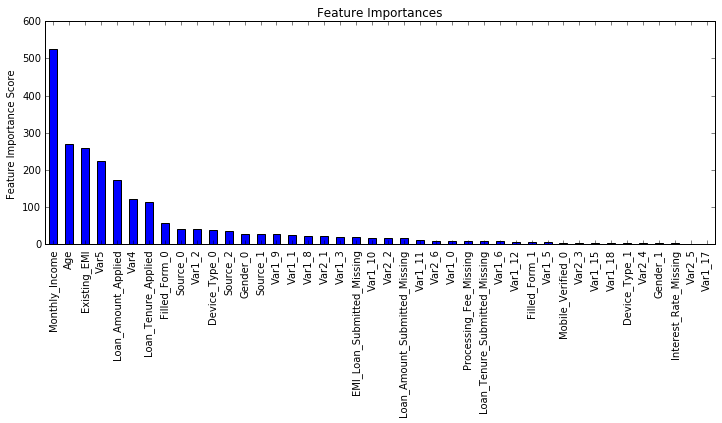

In [4]:
#Choose all predictors except target & IDcols

start_time = time.time()

predictors = [x for x in train.columns if x not in [target, IDcol]]

xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb1, train, predictors)

print('---------------')
print("predict time:{}s".format(round((time.time()-start_time), 3) ))

As you can see that here we got 140 as the optimal estimators for 0.1 learning rate. Note that this value
might be too high for you depending on the power of your system. In that case you can increase the
learning rate and re-run the command to get the reduced number of estimators.

Note: You will see the test AUC as “AUC Score (Test)” in the outputs here. But this
would not appear if you try to run the command on your system as the data is not
made public. It’s provided here just for reference. The part of the code which
generates this output has been removed here.

### Step 2: Tune max_depth and min_child_weight

We tune these first as they will have the highest impact on model outcome. To start with, let’s set wider ranges and then we will perform another iteration for smaller ranges.

Important Note: I’ll be doing some heavy-duty grid searched in this section which can take 15-30 mins
or even more time to run depending on your system. You can vary the number of values you are testing
based on what your system can handle.

In [5]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols

param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
    }

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
    param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83788, std: 0.00888, params: {'min_child_weight': 1, 'max_depth': 3},
  mean: 0.83662, std: 0.00955, params: {'min_child_weight': 3, 'max_depth': 3},
  mean: 0.83736, std: 0.00843, params: {'min_child_weight': 5, 'max_depth': 3},
  mean: 0.84122, std: 0.00837, params: {'min_child_weight': 1, 'max_depth': 5},
  mean: 0.84133, std: 0.00680, params: {'min_child_weight': 3, 'max_depth': 5},
  mean: 0.84037, std: 0.00626, params: {'min_child_weight': 5, 'max_depth': 5},
  mean: 0.83630, std: 0.00686, params: {'min_child_weight': 1, 'max_depth': 7},
  mean: 0.83527, std: 0.00690, params: {'min_child_weight': 3, 'max_depth': 7},
  mean: 0.83614, std: 0.00556, params: {'min_child_weight': 5, 'max_depth': 7},
  mean: 0.82714, std: 0.00635, params: {'min_child_weight': 1, 'max_depth': 9},
  mean: 0.82814, std: 0.00807, params: {'min_child_weight': 3, 'max_depth': 9},
  mean: 0.83045, std: 0.00672, params: {'min_child_weight': 5, 'max_depth': 9}],
 {'max_depth': 5, 'min_child_weight': 3

Here, we have run 12 combinations with wider intervals between values. The ideal values are 5 for
max_depth and 5 for min_child_weight. Lets go one step deeper and look for optimum values. We’ll
search for values 1 above and below the optimum values because we took an interval of two.

In [6]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols

param_test2 = {
    'max_depth':[4,5,6],
    'min_child_weight':[4,5,6]
    }

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
    min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
    param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(train[predictors],train[target])

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84046, std: 0.00604, params: {'min_child_weight': 4, 'max_depth': 4},
  mean: 0.84052, std: 0.00762, params: {'min_child_weight': 5, 'max_depth': 4},
  mean: 0.84025, std: 0.00710, params: {'min_child_weight': 6, 'max_depth': 4},
  mean: 0.84124, std: 0.00575, params: {'min_child_weight': 4, 'max_depth': 5},
  mean: 0.84037, std: 0.00626, params: {'min_child_weight': 5, 'max_depth': 5},
  mean: 0.84040, std: 0.00709, params: {'min_child_weight': 6, 'max_depth': 5},
  mean: 0.83870, std: 0.00550, params: {'min_child_weight': 4, 'max_depth': 6},
  mean: 0.83860, std: 0.00547, params: {'min_child_weight': 5, 'max_depth': 6},
  mean: 0.83642, std: 0.00638, params: {'min_child_weight': 6, 'max_depth': 6}],
 {'max_depth': 5, 'min_child_weight': 4},
 0.8412419855272365)

Here, we get the optimum values as 4 for max_depth and 6 for min_child_weight. Also, we can
see the CV score increasing slightly. Note that as the model performance increases, it becomes
exponentially difficult to achieve even marginal gains in performance. You would have noticed that here we
got 6 as optimum value for min_child_weight but we haven’t tried values more than 6. We can do that as
follow:.

In [7]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols

param_test2b = {
    'min_child_weight':[6,8,10,12]
    }

gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
    min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
    param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2b.fit(train[predictors],train[target])

gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84025, std: 0.00710, params: {'min_child_weight': 6},
  mean: 0.83979, std: 0.00715, params: {'min_child_weight': 8},
  mean: 0.84049, std: 0.00623, params: {'min_child_weight': 10},
  mean: 0.83993, std: 0.00760, params: {'min_child_weight': 12}],
 {'min_child_weight': 10},
 0.84048764848805835)

We see 6 as the optimal value.

### Step 3: Tune gamma

Now lets tune gamma value using the parameters already tuned above. Gamma can take various values
but I’ll check for 5 values here. You can go into more precise values as.

In [8]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols

param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
    }

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
    min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
    param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch3.fit(train[predictors],train[target])

gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84025, std: 0.00710, params: {'gamma': 0.0},
  mean: 0.83962, std: 0.00740, params: {'gamma': 0.1},
  mean: 0.84083, std: 0.00669, params: {'gamma': 0.2},
  mean: 0.84094, std: 0.00734, params: {'gamma': 0.3},
  mean: 0.83989, std: 0.00667, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.84094120075792378)

This shows that our original value of gamma, i.e. 0 is the optimum one. Before proceeding, a good
idea would be to re-calibrate the number of boosting rounds for the updated parameters.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.894438


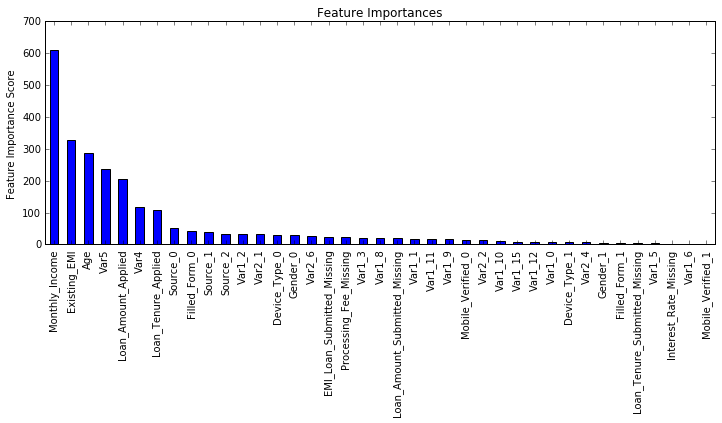

In [9]:
xgb2 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb2, train, predictors)

Here, we can see the improvement in score. So the final parameters are:
    * max_depth: 4
    * min_child_weight: 6
    * gamma: 0

### Step 4: Tune subsample and colsample_bytree

The next step would be try different subsample and colsample_bytree values. Lets do this in 2 stages as
well and take values 0.6,0.7,0.8,0.9 for both to start with.

In [10]:
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
    }

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
    min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
    param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(train[predictors],train[target])

gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83922, std: 0.00887, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.83949, std: 0.00884, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.83892, std: 0.00624, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.83936, std: 0.00605, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.84062, std: 0.00698, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.83973, std: 0.00732, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.84007, std: 0.00716, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.84112, std: 0.00651, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.84004, std: 0.00761, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.83893, std: 0.00825, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.83985, std: 0.00635, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.84137, std: 0.00786, params: {'subsample': 0.9, 'colsample_bytree'

Here, we found 0.8 as the optimum value for both subsample and colsample_bytree. Now we
should try values in 0.05 interval around these.

In [11]:
param_test5 = {
    'subsample':[i/100.0 for i in range(75,90,5)],
    'colsample_bytree':[i/100.0 for i in range(75,90,5)]
    }

gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
    min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
    param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(train[predictors],train[target])

gsearch5.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83945, std: 0.00784, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.83963, std: 0.00757, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: 0.84133, std: 0.00747, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: 0.83942, std: 0.00741, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: 0.83985, std: 0.00635, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.84116, std: 0.00773, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.84001, std: 0.00830, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: 0.84015, std: 0.00636, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: 0.84094, std: 0.00685, params: {'subsample': 0.85, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.9},
 0.84137280962117023)

Again we got the same values as before. Thus the optimum values are:
    * subsample: 0.8
    * colsample_bytree: 0.8

### Step 5: Tuning Regularization Parameters

Next step is to apply regularization to reduce overfitting. Though many people don’t use this parameters
much as gamma provides a substantial way of controlling complexity. But we should always try it. I’ll tune
‘reg_alpha’ value here and leave it upto you to try different values of ‘reg_lambda’.

In [12]:
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
    }

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
    min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
    param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(train[predictors],train[target])

gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83908, std: 0.00653, params: {'reg_alpha': 1e-05},
  mean: 0.84065, std: 0.00638, params: {'reg_alpha': 0.01},
  mean: 0.84068, std: 0.00693, params: {'reg_alpha': 0.1},
  mean: 0.84047, std: 0.00725, params: {'reg_alpha': 1},
  mean: 0.81263, std: 0.01504, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.1},
 0.84067934565387747)

We can see that the CV score is less than the previous case. But the values tried are very widespread,
we should try values closer to the optimum here (0.01) to see if we get something better.

In [13]:
param_test7 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
    }

gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
    min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
    param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch7.fit(train[predictors],train[target])

gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

C:\Users\dcjong\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83908, std: 0.00653, params: {'reg_alpha': 0},
  mean: 0.83967, std: 0.00616, params: {'reg_alpha': 0.001},
  mean: 0.84015, std: 0.00695, params: {'reg_alpha': 0.005},
  mean: 0.84065, std: 0.00638, params: {'reg_alpha': 0.01},
  mean: 0.84047, std: 0.00629, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.01},
 0.84065484773189758)

You can see that we got a better CV. Now we can apply this regularization in the model and look at the
impact:


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.884326


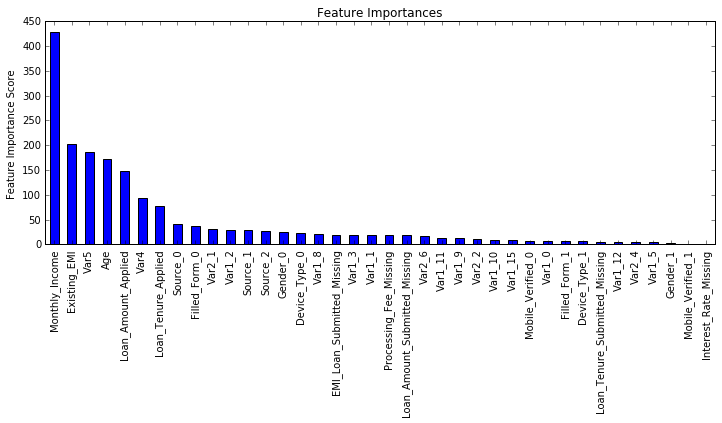

In [14]:
xgb3 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb3, train, predictors)    

Again we can see slight improvement in the score.

### Step 6: Reducing Learning Rate

Lastly, we should lower the learning rate and add more trees. Lets use the cv function of XGBoost to do
the job again.


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.884128


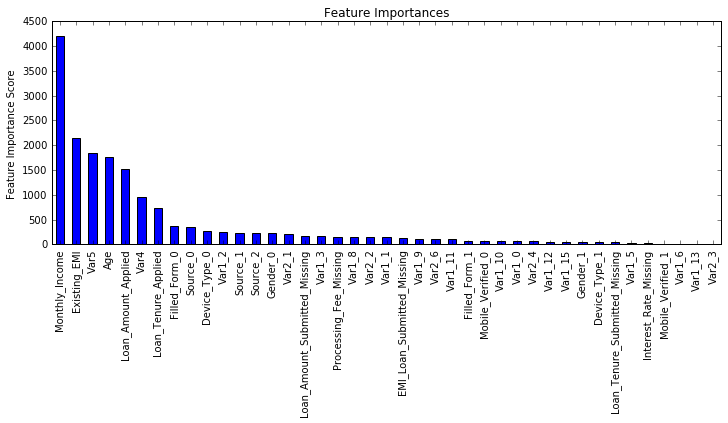

In [15]:
xgb4 = XGBClassifier(
    learning_rate =0.01,
    n_estimators=5000,
    max_depth=4,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb4, train, predictors)

Now we can see a significant boost in performance and the effect of parameter tuning is clearer.

## Conclusions

As we come to the end, I would like to share 2 key thoughts:
1. It is difficult to get a very big leap in performance by just using parameter tuning or slightly
better models. The max score for GBM was 0.8487 while XGBoost gave 0.8494. This is a decent
improvement but not something very substantial.
2. A significant jump can be obtained by other methods like feature engineering, creating ensemble of
models, stacking, etc